# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [35]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import plot_tree

from sklearn.metrics import mean_squared_error



### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [20]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [21]:
#verificar valores ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())

#remover valores ausentes (caso existam)
df = df.dropna()

#exibir as primeiras linhas para garantir a formatação
df.head()


Valores ausentes por coluna:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [22]:
#double-check valores ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())

Valores ausentes por coluna:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

/var/folders/rh/bjc5nd5j3ms0yq3xbl3f03n80000gn/T/ipykernel_2423/1301889845.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


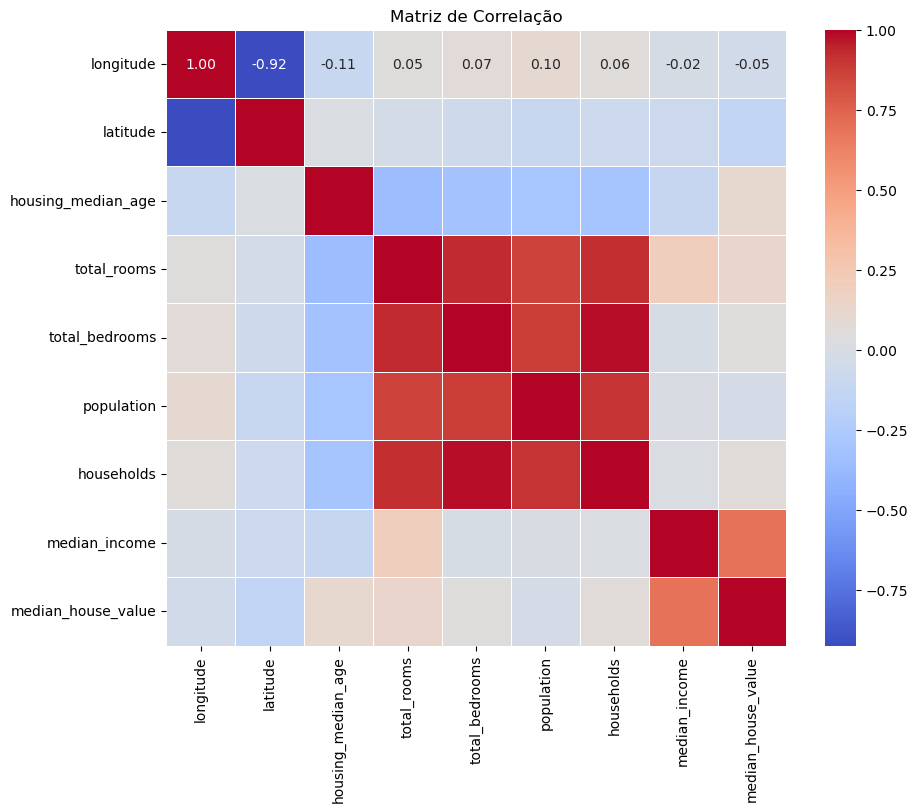

In [25]:
#matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

#maiores relacoes encontradas:

total_bedrooms x households

population x households

total_rooms x total_bedrooms #relacionado

total_rooms x households

### 3. Separe os dados em validação e teste

In [28]:
#separar variaveis preditoras (X) e alvo (y)
X = df.drop(columns=['median_house_value', 'ocean_proximity'])
y = df['median_house_value']

#dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

#removemos median_house_value da base porque é a variavel que queremos prever. 
#tambem excluimos ocean_proximity porque é categórica e precisaria ser tratada antes do uso.

Tamanho do conjunto de treino: 16346 amostras
Tamanho do conjunto de teste: 4087 amostras


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [29]:
#treinamos duas árvores, uma com profundidade max_depth=8 e outra com max_depth=2

#treinamento das árvores de decisão
tree_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)

#ajustar os modelos
tree_depth_8.fit(X_train, y_train)
tree_depth_2.fit(X_train, y_train)

print("Árvores treinadas com sucesso!")

Árvores treinadas com sucesso!


### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [31]:
#fazer previsoes no conjunto de teste
y_pred_8 = tree_depth_8.predict(X_test)
y_pred_2 = tree_depth_2.predict(X_test)

#avaliacao dos modelos
mae_8 = mean_absolute_error(y_test, y_pred_8)
mse_8 = mean_squared_error(y_test, y_pred_8)

mae_2 = mean_absolute_error(y_test, y_pred_2)
mse_2 = mean_squared_error(y_test, y_pred_2)

print(f"Árvore Profundidade 8 - MAE: {mae_8:.2f}, MSE: {mse_8:.2f}")
print(f"Árvore Profundidade 2 - MAE: {mae_2:.2f}, MSE: {mse_2:.2f}")

Árvore Profundidade 8 - MAE: 44169.05, MSE: 4172173153.18
Árvore Profundidade 2 - MAE: 66625.34, MSE: 7608731340.05


**a arvore de profundidade 8 possui um numero menor tanto de MAE quanto de MSE, este modelo esta prevendo melhor a variavel**

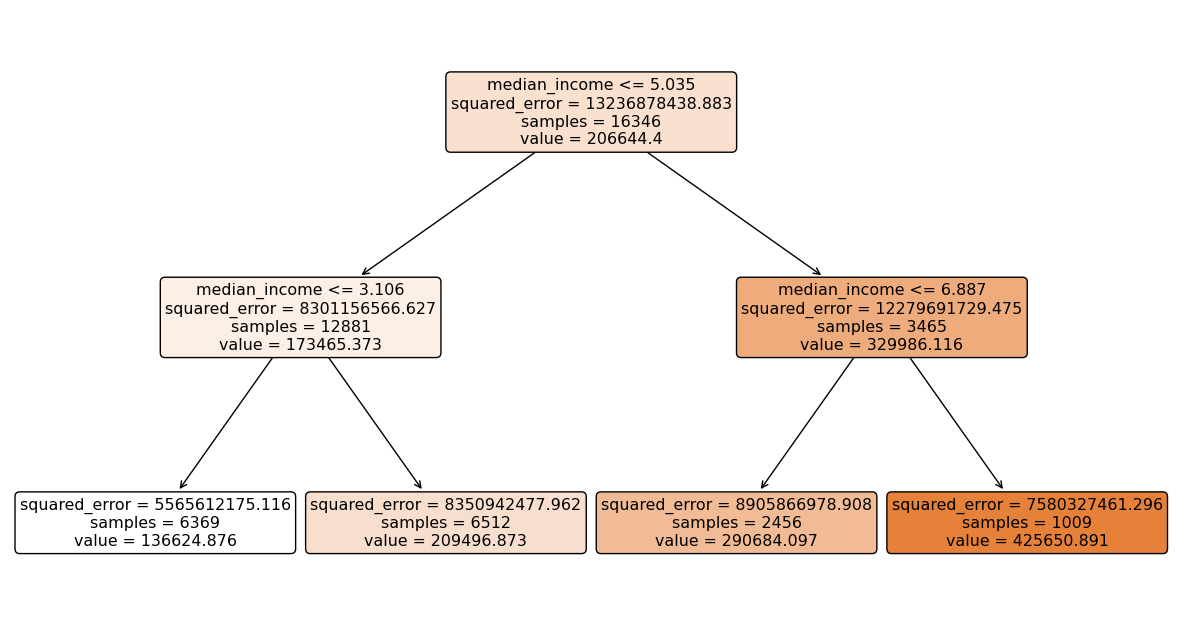

In [33]:
#visualizar a arvore com profundidade 2 (mais facil de interpretar)
plt.figure(figsize=(15, 8))
plot_tree(tree_depth_2, feature_names=X.columns, filled=True, rounded=True)
plt.show()

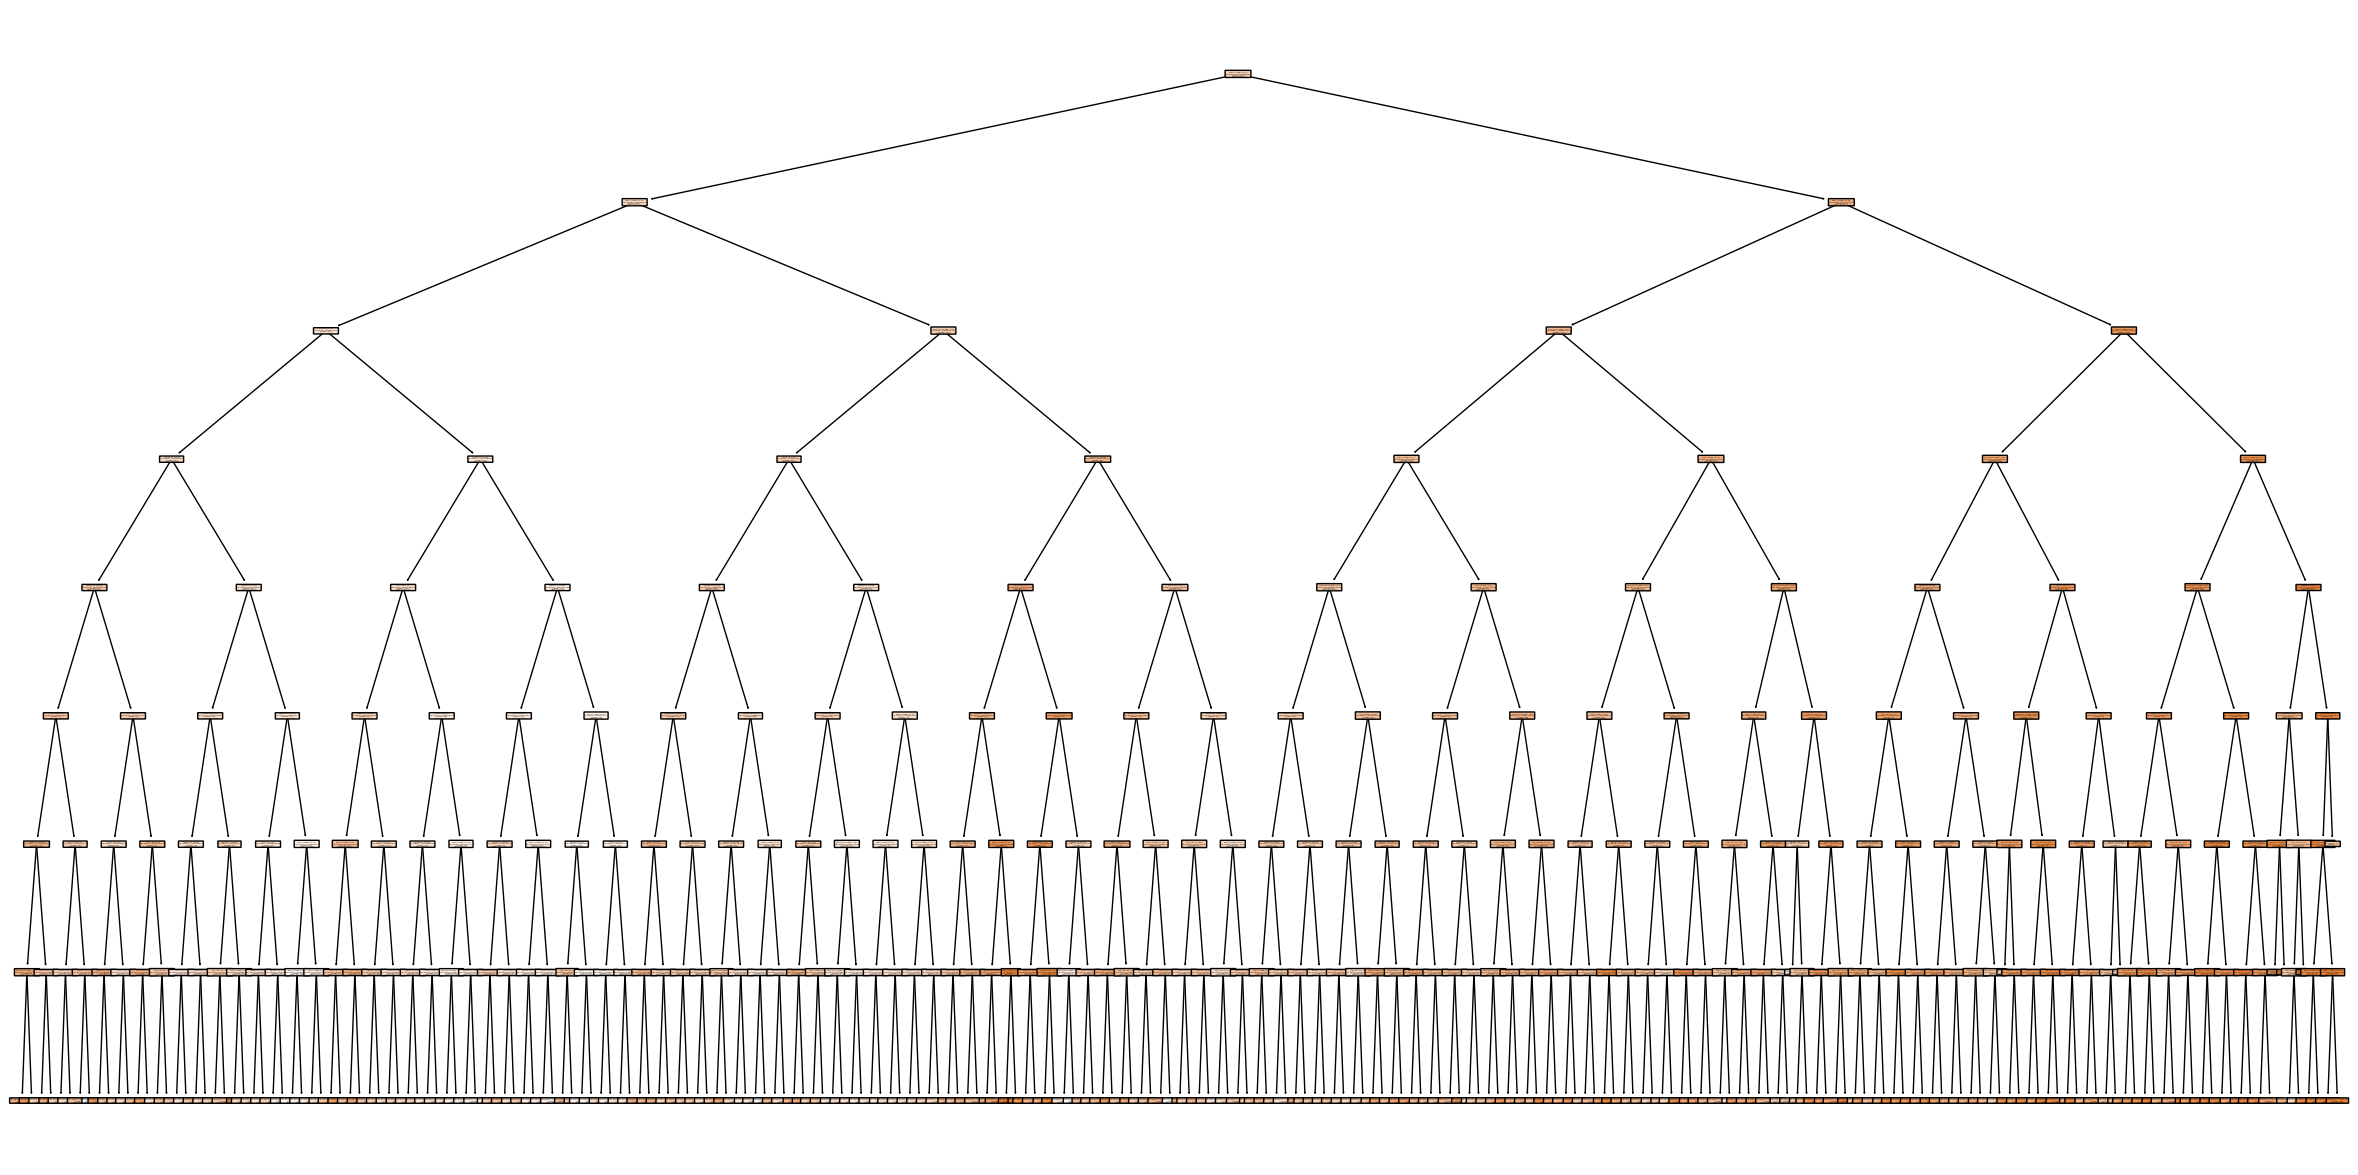

In [37]:
#visualizar a arvore com profundidade 8
plt.figure(figsize=(30, 15))
plot_tree(tree_depth_8, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [39]:
#outra forma de verificar somente MSE:

#fazer previsoes no conjunto de treino
y_train_pred_8 = tree_depth_8.predict(X_train)
y_train_pred_2 = tree_depth_2.predict(X_train)

#fazer previsoes no conjunto de teste
y_test_pred_8 = tree_depth_8.predict(X_test)
y_test_pred_2 = tree_depth_2.predict(X_test)

#calculo do MSE
mse_train_8 = mean_squared_error(y_train, y_train_pred_8)
mse_test_8 = mean_squared_error(y_test, y_test_pred_8)

mse_train_2 = mean_squared_error(y_train, y_train_pred_2)
mse_test_2 = mean_squared_error(y_test, y_test_pred_2)

#exibir os resultados
print(f"Árvore Profundidade 8 - MSE Treino: {mse_train_8:.2f}, MSE Teste: {mse_test_8:.2f}")
print(f"Árvore Profundidade 2 - MSE Treino: {mse_train_2:.2f}, MSE Teste: {mse_test_2:.2f}")


Árvore Profundidade 8 - MSE Treino: 3307237032.43, MSE Teste: 4172173153.18
Árvore Profundidade 2 - MSE Treino: 7301485444.05, MSE Teste: 7608731340.05


Aqui como o MSE de treino nao foi muito menor do que o de teste, significa que nao houve overfitting (generaliza bem)

### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

**Conclusão:**

A árvore com profundidade 8 teve um erro menor, indicando que conseguiu capturar mais padrões dos dados. No entanto, pode estar sofrendo de overfitting

A árvore com profundidade 2 teve um erro maior, mas pode ser mais generalizável para novos dados


In [41]:
#outra forma de verificar:

if mse_test_8 > mse_test_2:
    print("A árvore com profundidade 2 parece mais adequada, pois tem menor erro de teste e pode ser mais generalizável.")
else:
    print("A árvore com profundidade 8 pode ser mais precisa, mas precisamos avaliar se há overfitting.")


A árvore com profundidade 8 pode ser mais precisa, mas precisamos avaliar se há overfitting.


### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

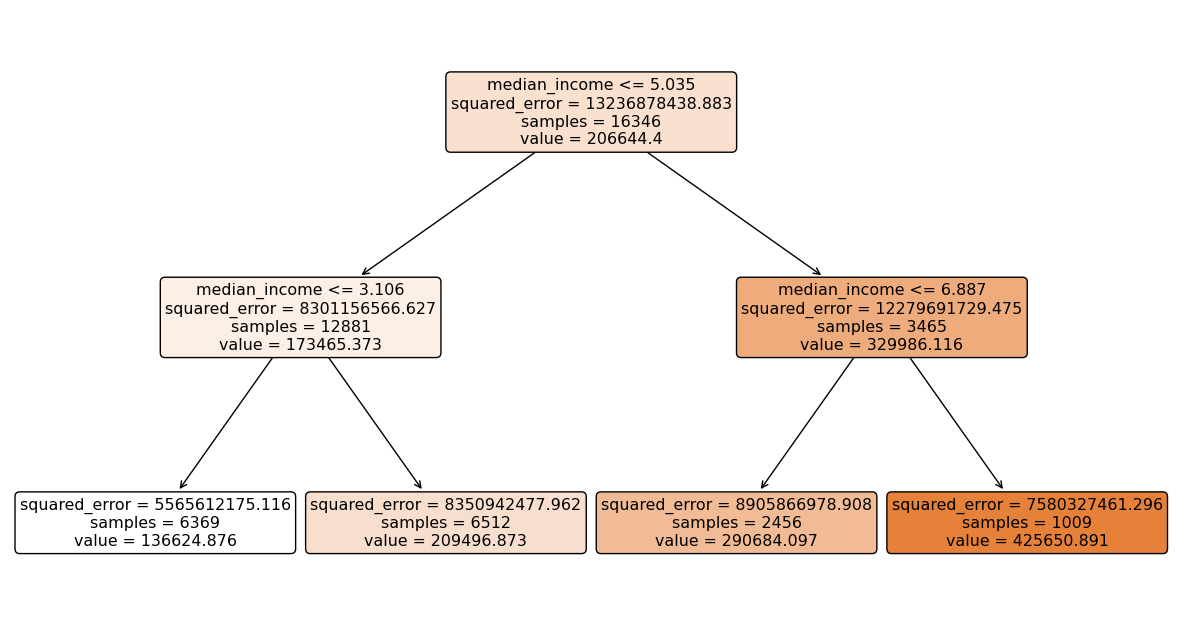

In [42]:
#visualizar a árvore com profundidade 2 (mais fácil de interpretar)
plt.figure(figsize=(15, 8))
plot_tree(tree_depth_2, feature_names=X.columns, filled=True, rounded=True)
plt.show()

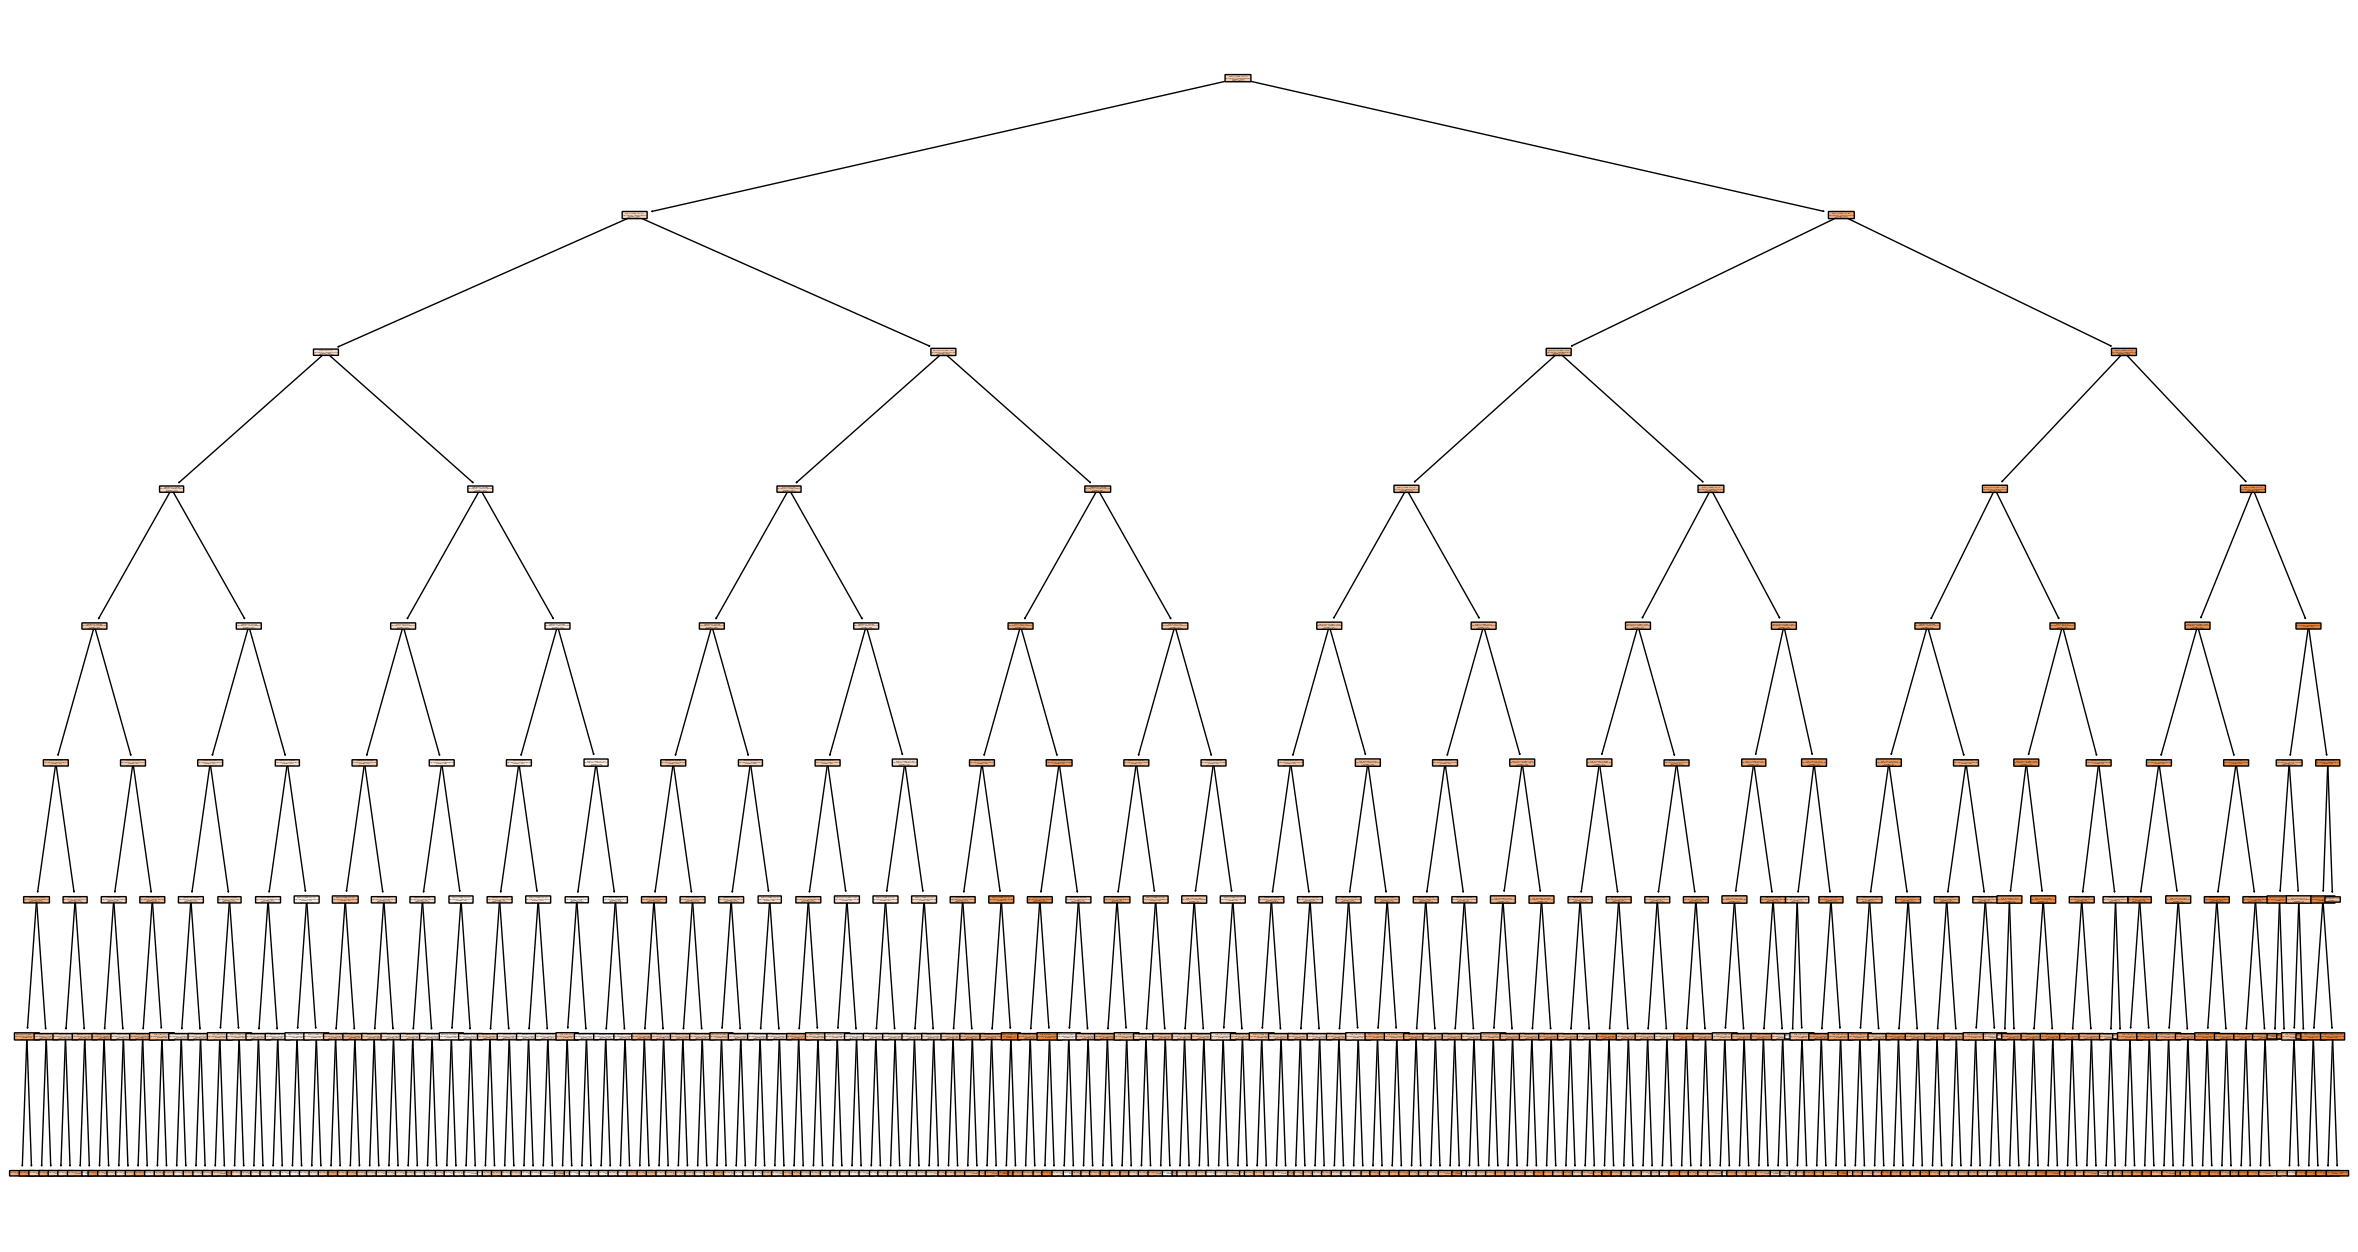

In [44]:
#a arvore com profundidade 8 é muito complexa como podem ver nas linhas acima, segue novamente:

plt.figure(figsize=(30, 16))
plot_tree(tree_depth_8, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [52]:
#importancia das variaveis no modelo de profundidade 2
importances = tree_depth_2.feature_importances_

#criar um dataFrame para exibir melhor os valores
feature_importance_df = pd.DataFrame({'Variável': X.columns, 'Importância': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importância', ascending=False)

print("Importância das variáveis no modelo:")
print(feature_importance_df)


Importância das variáveis no modelo:
             Variável  Importância
7       median_income          1.0
0           longitude          0.0
1            latitude          0.0
2  housing_median_age          0.0
3         total_rooms          0.0
4      total_bedrooms          0.0
5          population          0.0
6          households          0.0


In [54]:
#importancia das variaveis no modelo de profundidade 8
importances = tree_depth_8.feature_importances_

#criar um dataframe para exibir melhor os valores
feature_importance_df = pd.DataFrame({'Variável': X.columns, 'Importância': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importância', ascending=False)

print("Importância das variáveis no modelo:")
print(feature_importance_df)


importância das variáveis no modelo:
             Variável  Importância
7       median_income     0.634963
0           longitude     0.159687
1            latitude     0.126075
2  housing_median_age     0.054422
5          population     0.007877
6          households     0.007736
4      total_bedrooms     0.004684
3         total_rooms     0.004555


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.45963 to fit


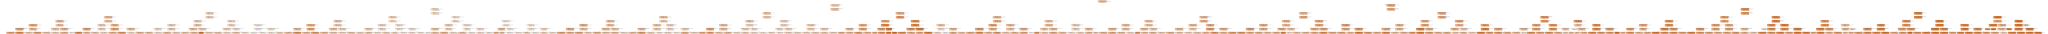

In [51]:
#testando o graphviz
from sklearn.tree import export_graphviz
import graphviz

#funcao para gerar e exibir a arvore
def visualizar_arvore(arvore, nome):
    dot_data = export_graphviz(
        arvore, 
        out_file=None, 
        feature_names=X.columns, 
        filled=True, 
        rounded=True, 
        special_characters=True
    )
    graph = graphviz.Source(dot_data)
    graph.render(nome, format='png', cleanup=False) #salva a arvore como imagem
    return graph

#gerar arvores para profundidade 2 e 8
arvore_2 = visualizar_arvore(tree_depth_2, "arvore_profundidade_2")
arvore_8 = visualizar_arvore(tree_depth_8, "arvore_profundidade_8")

#exibir as arvores
arvore_2
arvore_8


# Conclusão da Análise do Modelo de Regressão com Árvores de Decisão  

a variável **"median_income"** (renda mediana da região) foi de longe a mais importante para a predição do valor das casas, com um peso de **63,5%** no modelo. Isso faz sentido, pois a renda das pessoas em uma região geralmente está fortemente correlacionada com o preço dos imóveis.  

as coordenadas geográficas **longitude (15,9%)** e **latitude (12,6%)** também tiveram um impacto significativo. Isso indica que a localização geográfica é um fator relevante na precificação dos imóveis, porque algumas áreas são mais valorizadas que outras.  

outras variáveis, como **housing_median_age (5,4%)**, **population (0,7%)** e **households (0,7%)**, tiveram uma influência bem menor. Já **total_bedrooms (0,4%)** e **total_rooms (0,4%)** foram praticamente irrelevantes na árvore de decisão.  


- o preço das casas é fortemente influenciado pela **renda da população** e pela **localização**.  
